In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data_read=pd.read_csv("Advertising.csv")

In [4]:
print("                                                    The DATA_SET       ")
print()
print()
print(data_read)

                                                    The DATA_SET       


     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [5]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data_read.head(8)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2


In [7]:
data_read.tail(8)

,Unnamed: 0,TV,Radio,Newspaper,Sales
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
data_read.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
data_read.shape

(200, 5)

In [10]:
data_read.size

1000

In [11]:
data_read.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
data_read.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


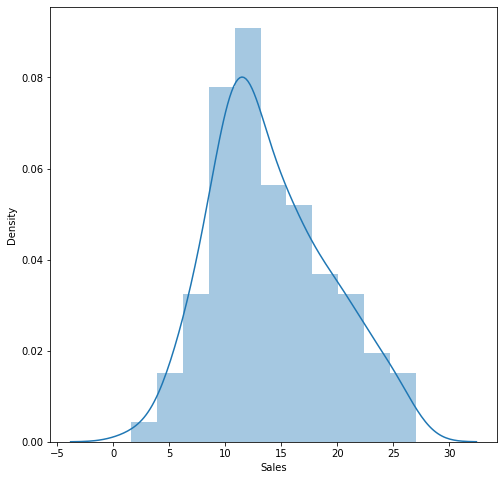

In [13]:
pt.figure(figsize=(8,8))
sb.distplot(data_read['Sales'])
pt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


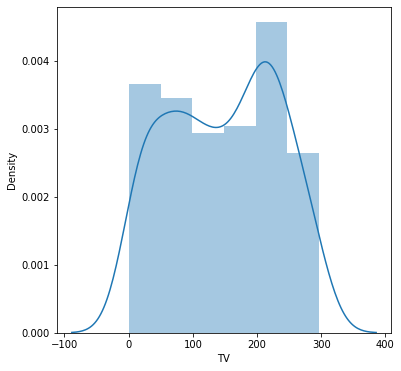

In [14]:
pt.figure(figsize=(6,6))
sb.distplot(data_read['TV'])
pt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


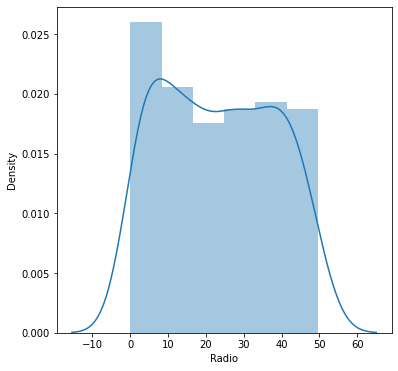

In [15]:
pt.figure(figsize=(6,6))
sb.distplot(data_read['Radio'])
pt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


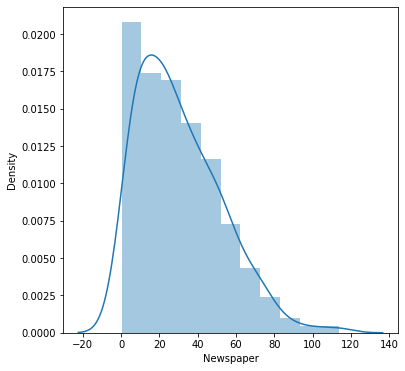

In [16]:
pt.figure(figsize=(6,6))
sb.distplot(data_read['Newspaper'])
pt.show()

In [17]:
data_read.duplicated().value_counts()

False    200
dtype: int64

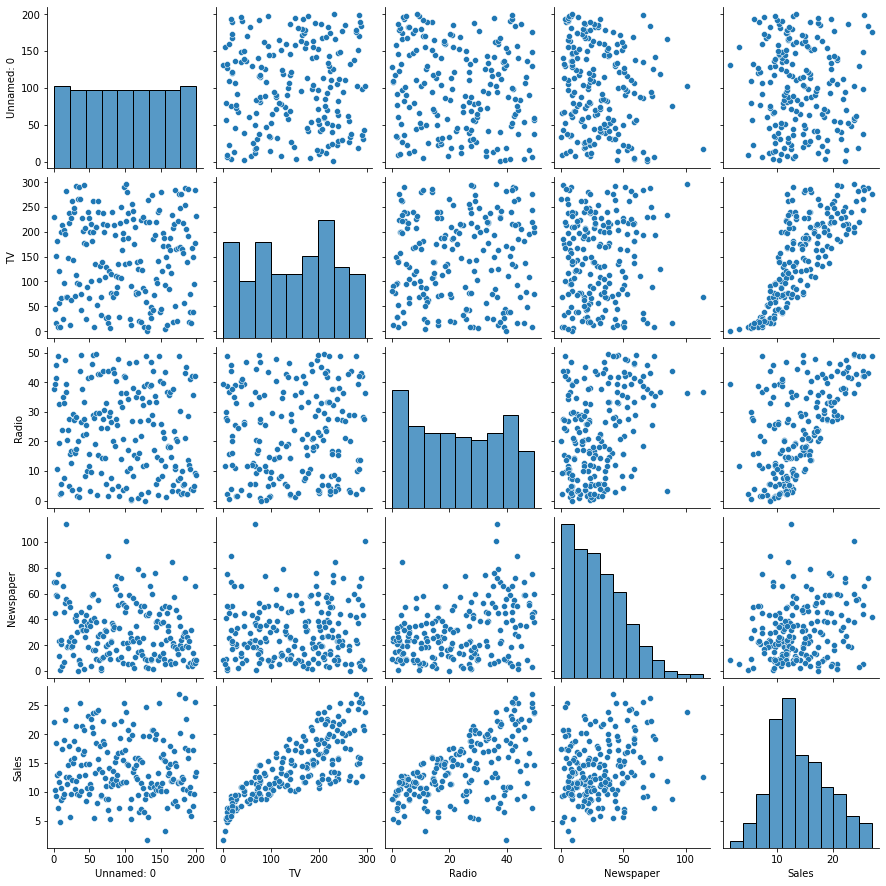

In [18]:
sb.pairplot(data_read)

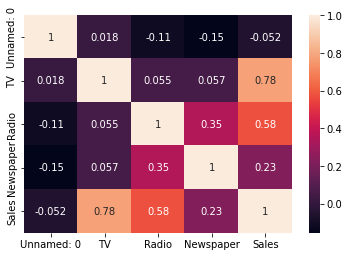

In [19]:
cor=data_read.corr()
sb.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)

In [20]:
dta=data_read.drop(['Unnamed: 0'],axis=1,inplace=True)
data_read

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
data_read.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [22]:
x=np.array(data_read.drop(['Sales'], 1))
y=np.array(data_read['Sales'])

<ipython-input-22-f5079ff454ce>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=np.array(data_read.drop(['Sales'], 1))


In [23]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y,train_size=0.8,test_size=0.2,random_state=0)

In [24]:
regress= LinearRegression()
regress.fit(xtrain, ytrain)

LinearRegression()

In [25]:
yprediction = regress.predict(xtest)
yprediction

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [26]:
yprediction = regress.predict(xtest)
yprediction

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [27]:
inter = regress.intercept_
inter

2.994893030495332

In [28]:
r2_score(ytest,yprediction)

0.8601145185017868

In [29]:
r2_score(ytest,yprediction)

0.8601145185017868

In [35]:
data_print = pd.DataFrame(data={"Predicted Sales": yprediction.flatten()})
print(data_print)

    Predicted Sales
0         10.057396
1          7.452281
2          7.019708
3         24.080297
4         12.017863
5          6.537939
6         12.782869
7         15.109746
8         10.769740
9         16.343580
10        22.882975
11         9.129245
12        10.464557
13        15.487436
14        11.585556
15        12.172969
16        18.765515
17        10.783186
18        15.905160
19        17.306513
20        24.066921
21         9.598342
22        15.135122
23        12.385915
24         5.713609
25        15.247493
26        12.294023
27        20.942117
28        13.409916
29         9.043488
30        12.892394
31        21.402720
32        18.138022
33        21.173208
34         6.569744
35         6.141142
36         7.890184
37        13.015414
38        14.689538
39         6.188351


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


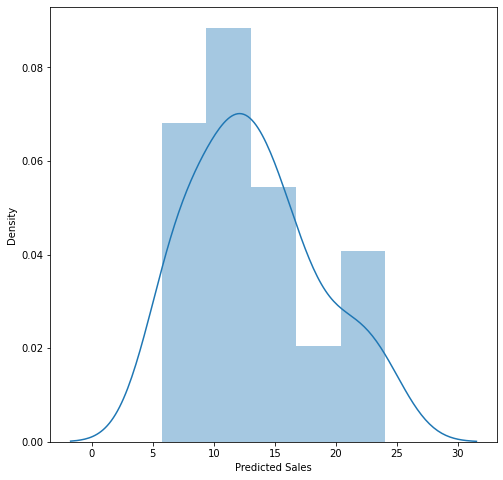

In [37]:
pt.figure(figsize=(8,8))
sb.distplot(data_print['Predicted Sales'])
pt.show()
